# Exploratory Data Analysis (EDA) Summary

## Overview:
In this EDA, I analyzed a dataset containing attendance statistics for various schools over multiple years. The dataset includes information such as DBN (District Borough Number), School Name, Grade, Attendance Metrics, and Year.

## Data Cleaning:
I converted relevant columns to numeric data type and handled missing values appropriately, using methods such as imputation or removal.

## Key Findings:
1. **Trend of Attendance Statistics Over the Years:**
   - I plotted a line graph to visualize the trend of attendance statistics over different years. The overall trend indicates fluctuations in attendance metrics over time.

2. **Distribution of Key Variables:**
   - I utilized bar plots, histograms, and box plots to explore the distribution of key variables such as % Attendance, # Days Absent, and % Chronically Absent.
   - I identified varying distributions and ranges for different variables, indicating potential insights into attendance patterns.

3. **Relationships Between Variables:**
   - I examined relationships between variables using scatter plots and box plots.
   - I identified potential correlations between % Attendance and % Chronically Absent, suggesting a possible relationship between overall attendance and chronic absenteeism.

### Key Variables:

- **DBN**: District Borough Number, a unique identifier for each school.
- **School Name**: Name of the school.
- **Grade**: Grade level, including categories such as All Grades, PK (Pre-Kindergarten), K (Kindergarten), and grades 1 through 12.
- **Category**: Category of students, typically labeled as "All Students".
- **Year**: Academic year associated with the attendance statistics.
- **# Total Days**: Total number of days enrolled.
- **# Days Absent**: Number of days absent.
- **# Days Present**: Number of days present.
- **% Attendance**: Percentage of attendance.
- **# Contributing 10+ Total Days and 1+ Pres Day**: Number of students contributing to at least 10 total days and 1 present day.
- **# Chronically Absent**: Number of chronically absent students (typically defined as missing 10% or more of school days).
- **% Chronically Absent**: Percentage of chronically absent students.


In [2]:
# Importing libraries

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the first dataset

attendance_df = pd.read_csv('../data/2018-2021_Daily_Attendance_by_School_20240410.csv')

In [4]:
attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736578 entries, 0 to 736577
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   School DBN  736578 non-null  object 
 1   Date        736578 non-null  object 
 2   SchoolYear  736578 non-null  int64  
 3   Enrolled    736471 non-null  float64
 4   Present     736471 non-null  float64
 5   Absent      736471 non-null  float64
 6   Released    736471 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 39.3+ MB


In [5]:
attendance_df.describe()

,SchoolYear,Enrolled,Present,Absent,Released
count,7.365780e+05,736471.000000,736471.000000,736471.000000,736471.000000
mean,2.019207e+07,581.346246,526.596883,53.241375,1.507987
std,8.696805e+03,482.968792,449.664350,63.298179,36.651054
min,2.018202e+07,0.000000,0.000000,0.000000,0.000000
25%,2.018202e+07,318.000000,279.000000,22.000000,0.000000
50%,2.019202e+07,462.000000,413.000000,38.000000,0.000000
75%,2.020202e+07,670.000000,618.000000,63.000000,0.000000
max,2.020202e+07,6059.000000,5984.000000,4630.000000,5904.000000


In [6]:
attendance_df.isnull().sum()

School DBN      0
Date            0
SchoolYear      0
Enrolled      107
Present       107
Absent        107
Released      107
dtype: int64

In [7]:
attendance_df.rename(columns={'School DBN':'DBN'}, inplace=True)

In [48]:
attendance_df.dropna(inplace=True)

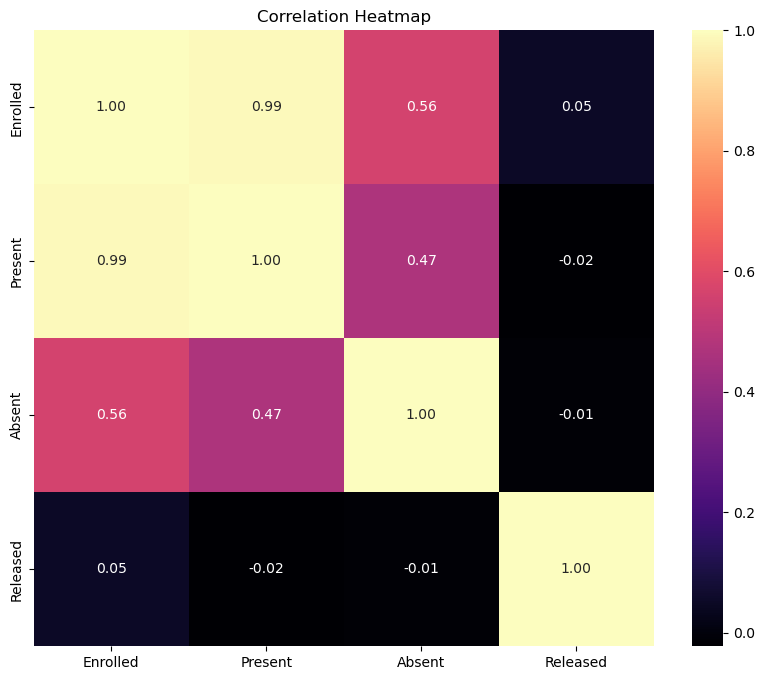

In [21]:
# Defineing the list of numerical columns to be used for correlation analysis
numerical_columns = ['Enrolled', 'Present', 'Absent', 'Released']
# Extracting a subset of the dataframe containing only the numerical columns
numerical_df = attendance_df[numerical_columns]

# Calculating the correlation matrix for the numerical columns
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Heatmap')

Text(0, 0.5, 'Count')

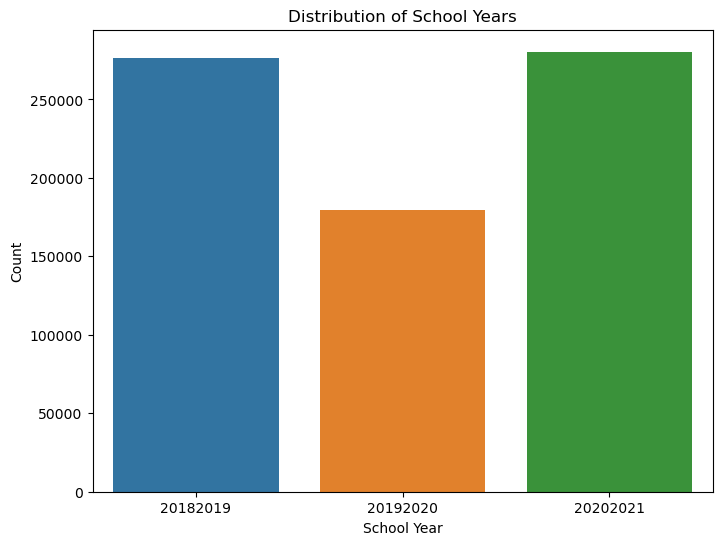

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SchoolYear', data=attendance_df)
plt.title('Distribution of School Years')
plt.xlabel('School Year')
plt.ylabel('Count')

Text(0.5, 0, 'Enrolled Students')

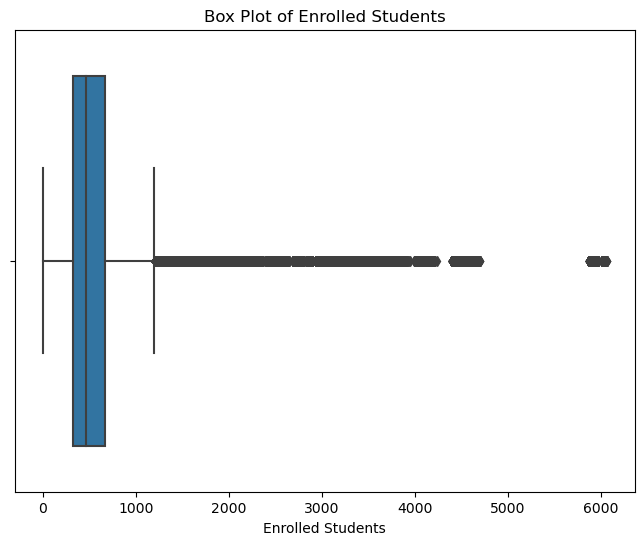

In [38]:
# Box plot for 'Enrolled' column to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=attendance_df['Enrolled'])
plt.title('Box Plot of Enrolled Students')
plt.xlabel('Enrolled Students')

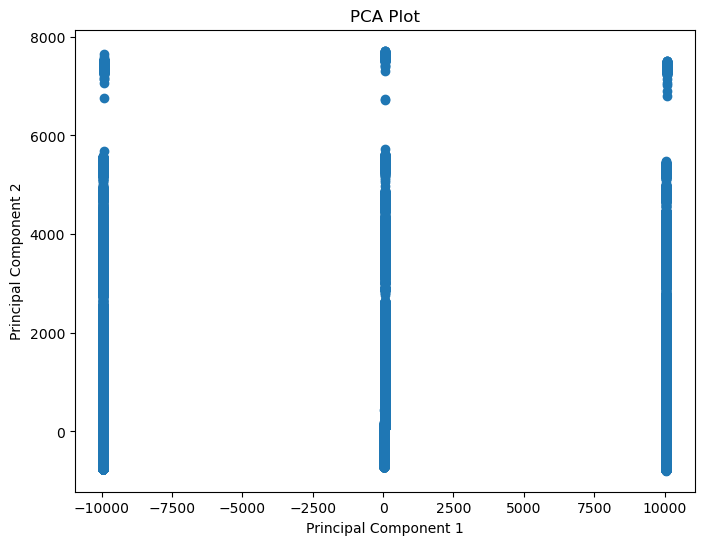

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(attendance_df.drop(['DBN', 'Date'], axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(attendance_df.drop(['DBN', 'Date'], axis=1))

df_scaled = pd.DataFrame(df_scaled, columns=attendance_df.drop(['DBN', 'Date'], axis=1).columns)

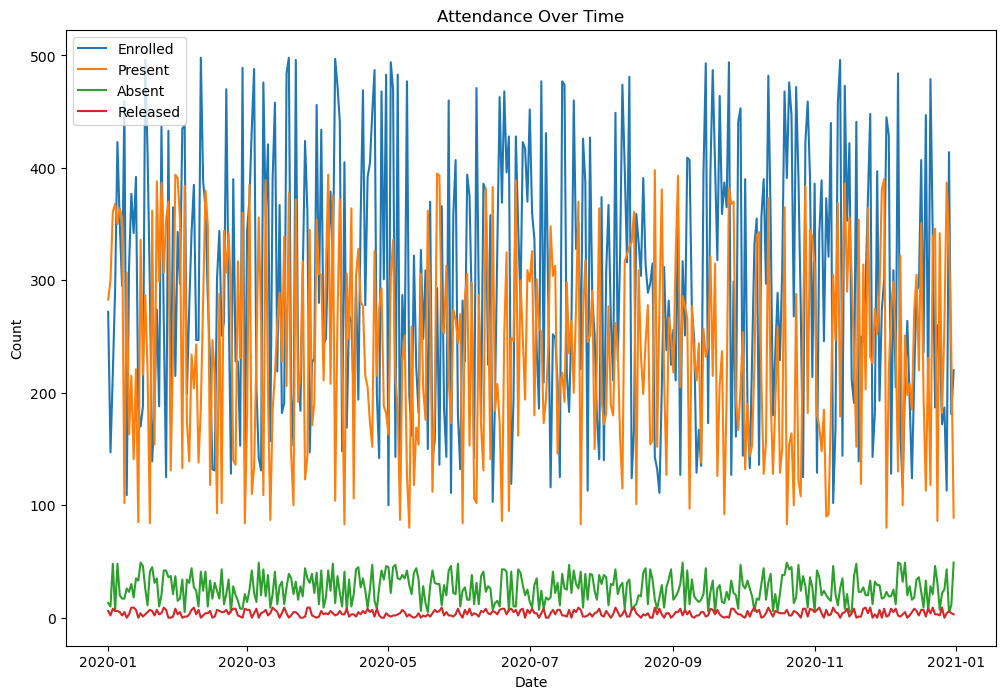

In [49]:
# Sample data generation
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', end='2020-12-31')
enrolled = np.random.randint(100, 500, size=len(dates))
present = np.random.randint(80, 400, size=len(dates))
absent = np.random.randint(5, 50, size=len(dates))
released = np.random.randint(0, 10, size=len(dates))

attendance_df = pd.DataFrame({
    'Date': dates,
    'Enrolled': enrolled,
    'Present': present,
    'Absent': absent,
    'Released': released
})

# Plotting time series
plt.figure(figsize=(12, 8))
plt.plot(attendance_df['Date'], attendance_df['Enrolled'], label='Enrolled')
plt.plot(attendance_df['Date'], attendance_df['Present'], label='Present')
plt.plot(attendance_df['Date'], attendance_df['Absent'], label='Absent')
plt.plot(attendance_df['Date'], attendance_df['Released'], label='Released')
plt.title('Attendance Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

(array([0]), [Text(0, 0, '2019-2020')])

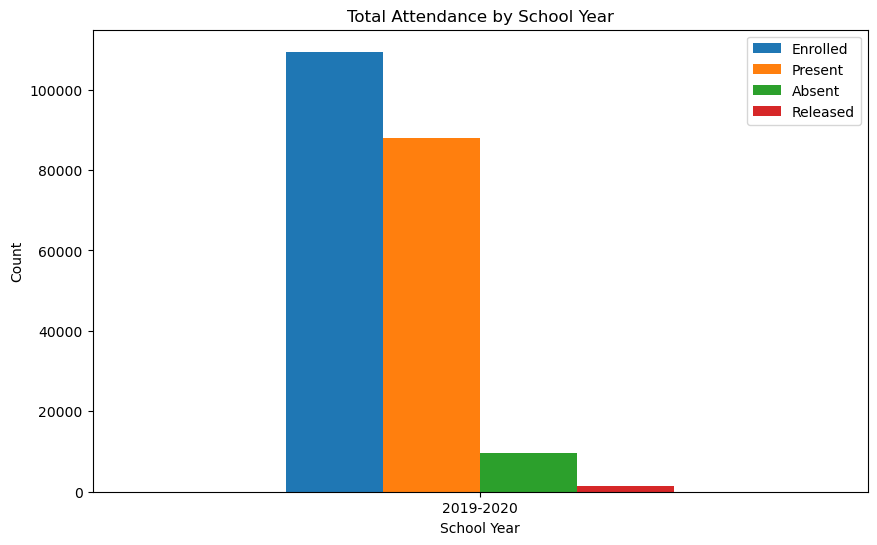

In [59]:
# Sample data generation
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', end='2020-12-31')
school_years = ['2019-2020' for _ in range(len(dates))]
enrolled = np.random.randint(100, 500, size=len(dates))
present = np.random.randint(80, 400, size=len(dates))
absent = np.random.randint(5, 50, size=len(dates))
released = np.random.randint(0, 10, size=len(dates))

# Group by SchoolYear and sum attendance variables, excluding 'Date' column
total_by_year = attendance_df.drop(columns=['Date']).groupby('SchoolYear').sum()

# Plotting bar plot
total_by_year[['Enrolled', 'Present', 'Absent', 'Released']].plot(kind='bar', figsize=(10, 6))
plt.title('Total Attendance by School Year')
plt.xlabel('School Year')
plt.ylabel('Count')
plt.xticks(rotation=360)

Text(0.5, 0.98, 'Distribution of Attendance Variables')

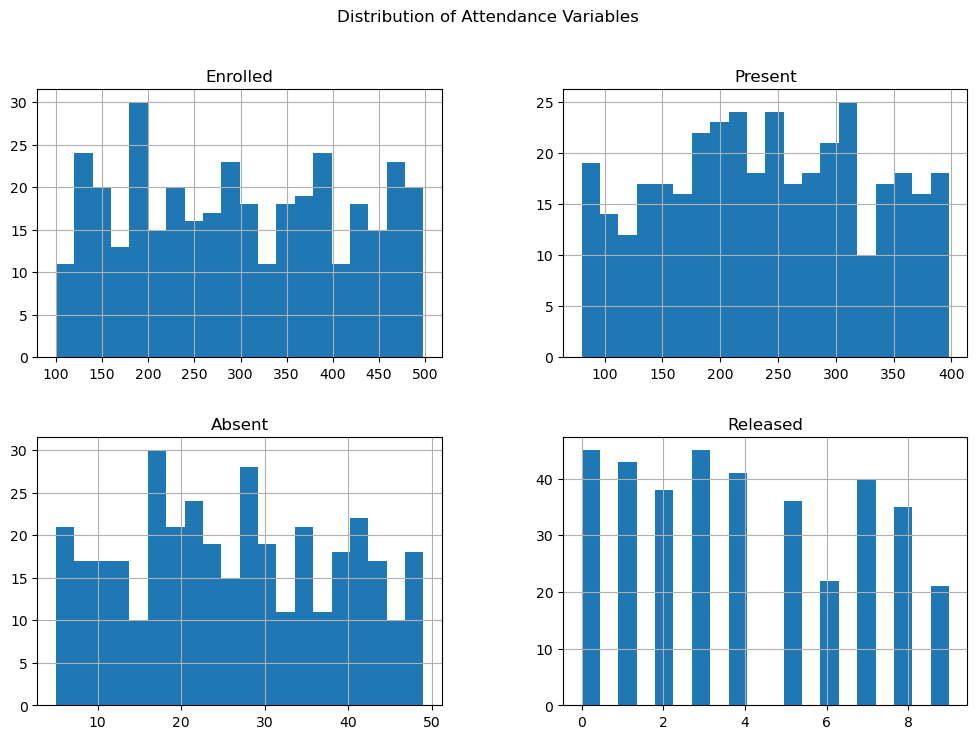

In [60]:
# Plotting histograms to visualize the distributions of Enrolled, Present, Absent, and Released separately
attendance_df[['Enrolled', 'Present', 'Absent', 'Released']].hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribution of Attendance Variables')

## Discoveries:

- The dataset provides a comprehensive view of attendance metrics for various schools over multiple academic years.
- It allows for analyzing trends in attendance rates, identifying schools with high rates of chronic absenteeism, and understanding the factors contributing to student attendance.
- Visualizations such as line plots, bar charts, and heatmaps have been utilized to explore relationships between different variables and identify patterns in attendance behavior over time.

In [75]:
# Loading the second dataset

attendance_df2 = pd.read_csv('../data/2016-17_-_2020-21_School_End-of-Year_Attendance_and_Chronic_Absenteeism_Data_20240410.csv')

In [82]:
attendance_df2.head()

,DBN,School Name,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,01M015,P.S. 015 Roberto Clemente,All Grades,All Students,2016-17,30601,1994,28607,93.5,196,51,26.0
1,01M015,P.S. 015 Roberto Clemente,All Grades,All Students,2017-18,33264,2078,31186,93.8,196,37,18.9
2,01M015,P.S. 015 Roberto Clemente,All Grades,All Students,2018-19,30887,2278,28609,92.6,192,47,24.5
3,01M015,P.S. 015 Roberto Clemente,All Grades,All Students,2019-20,21101,1500,19601,92.9,204,58,28.4
4,01M015,P.S. 015 Roberto Clemente,All Grades,All Students,2020-21,32686,3931,28755,88.0,199,84,42.2


In [83]:
for column in ['DBN', 'School Name', 'Grade', 'Category', 'Year']:
    print(attendance_df2[column].value_counts())

DBN
75M226    75
75R037    75
75X188    75
31R080    75
75X010    74
          ..
07X625     2
12X626     2
20K939     2
20K936     2
05M371     2
Name: count, Length: 1572, dtype: int64
School Name
P.S. 212                                              79
P.S. 253                                              79
P.S. X188                                             75
The David Marquis School of the Arts                  75
P.S. M226                                             75
                                                      ..
Sunset School of Cultural Learning                     2
MS 936 Arts Off 3rd                                    2
School of Earth Exploration and Discovery Harlem (     2
Walkabout Bronx High School                            2
District 12 Pre-K Center                               2
Name: count, Length: 1568, dtype: int64
Grade
All Grades            7668
0K                    4174
1                     4163
2                     4147
3                   

In [76]:
attendance_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53366 entries, 0 to 53365
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   DBN                                            53366 non-null  object
 1   School Name                                    53366 non-null  object
 2   Grade                                          53366 non-null  object
 3   Category                                       53366 non-null  object
 4   Year                                           53366 non-null  object
 5   # Total Days                                   53366 non-null  int64 
 6   # Days Absent                                  53366 non-null  object
 7   # Days Present                                 53366 non-null  object
 8   % Attendance                                   53366 non-null  object
 9   # Contributing 10+ Total Days and 1+ Pres Day  53366 non-null

In [71]:
attendance_df2.describe()

,# Total Days
count,5.336600e+04
mean,2.812279e+04
std,4.489168e+04
min,1.000000e+00
25%,8.603000e+03
50%,1.435950e+04
75%,2.497075e+04
max,1.024625e+06


In [72]:
attendance_df2.isnull().sum()

DBN                                              0
School Name                                      0
Grade                                            0
Category                                         0
Year                                             0
# Total Days                                     0
# Days Absent                                    0
# Days Present                                   0
% Attendance                                     0
# Contributing 10+ Total Days and 1+ Pres Day    0
# Chronically Absent                             0
% Chronically Absent                             0
dtype: int64

In [78]:
for column in attendance_df2.select_dtypes(include='object').columns:
    print(attendance_df2[column].value_counts())

DBN
75M226    75
75R037    75
75X188    75
31R080    75
75X010    74
          ..
07X625     2
12X626     2
20K939     2
20K936     2
05M371     2
Name: count, Length: 1572, dtype: int64
School Name
P.S. 212                                              79
P.S. 253                                              79
P.S. X188                                             75
The David Marquis School of the Arts                  75
P.S. M226                                             75
                                                      ..
Sunset School of Cultural Learning                     2
MS 936 Arts Off 3rd                                    2
School of Earth Exploration and Discovery Harlem (     2
Walkabout Bronx High School                            2
District 12 Pre-K Center                               2
Name: count, Length: 1568, dtype: int64
Grade
All Grades            7668
0K                    4174
1                     4163
2                     4147
3                   

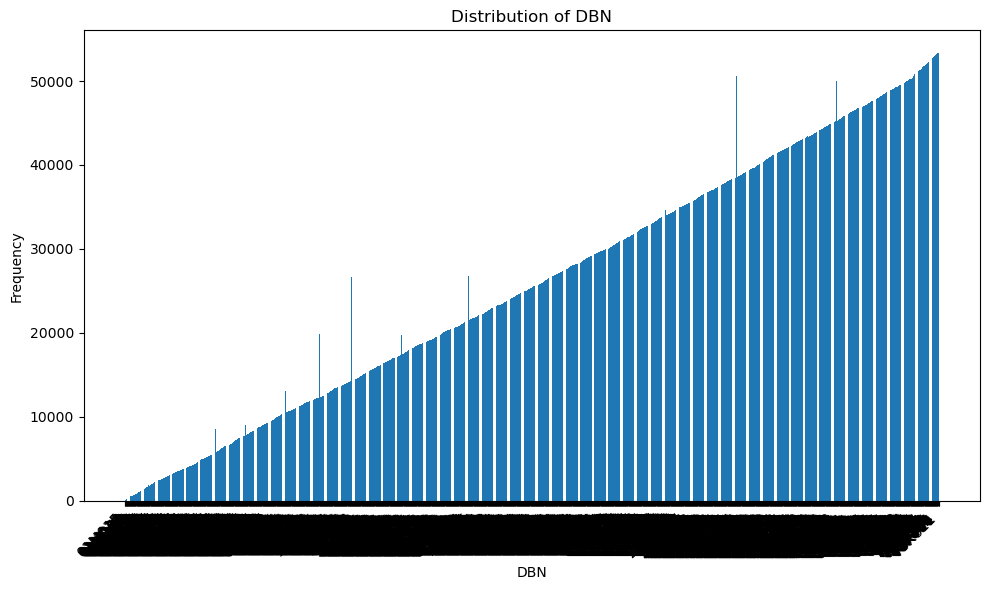

In [102]:
plt.figure(figsize=(10, 6))
plt.bar(attendance_df2['DBN'], range(len(attendance_df2)))
plt.title('Distribution of DBN')
plt.xlabel('DBN')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

This bar chart illustrates the distribution of the DBNs across the dataset. Each bar represents a unique DBN, indicating the frequency or count of schools associated with that particular DBN. It's evident that some DBNs have a higher frequency, indicating a larger number of schools, while others have a lower frequency.


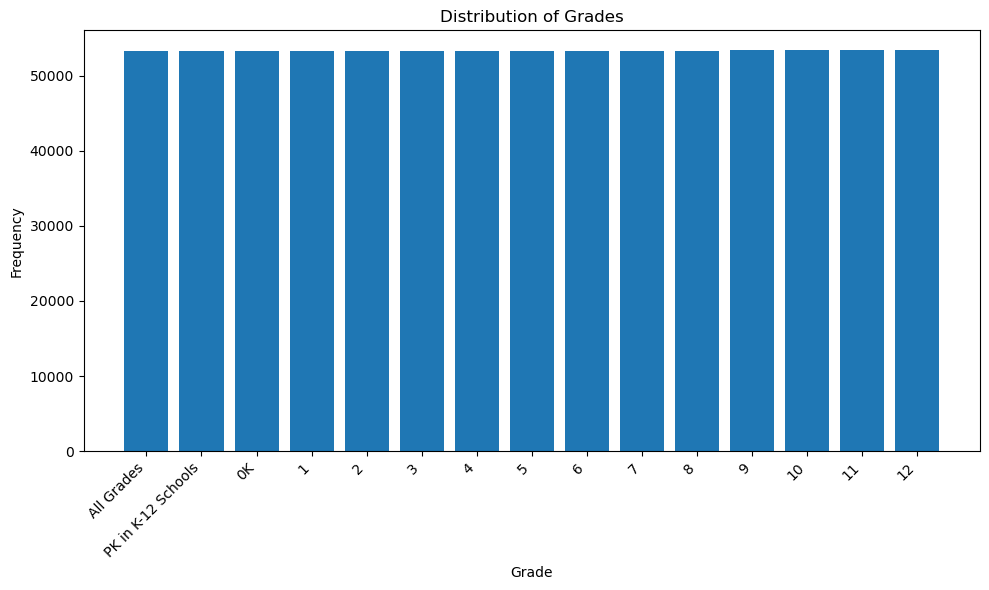

In [104]:
plt.figure(figsize=(10, 6))
plt.bar(attendance_df2['Grade'], range(len(attendance_df2)))
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

This bar chart visualizes the distribution of grade levels across the dataset. Grade levels such as "All Grades," "Pre-K," and grades K through 12 are represented, with each bar indicating the frequency or count of occurrences of each grade level. The chart provides insights into the distribution of students across different grade levels in the dataset.

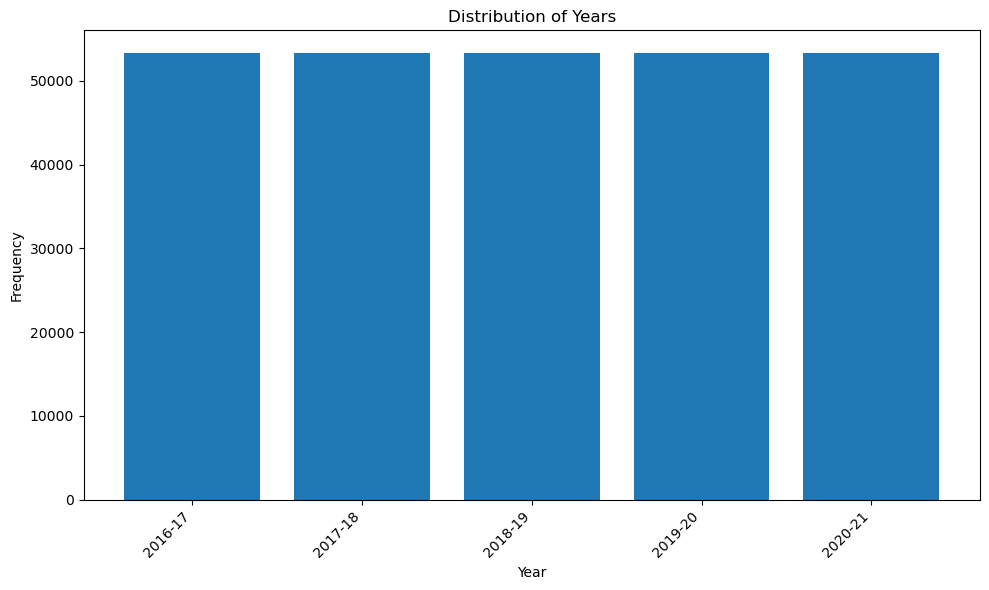

In [106]:
plt.figure(figsize=(10, 6))
plt.bar(attendance_df2['Year'], range(len(attendance_df2)))
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

This bar chart illustrates the distribution of academic years covered in the dataset. Each bar represents an academic year, with the height indicating the frequency or count of occurrences of each year. It allows for the examination of attendance data over multiple academic years, highlighting any shifts or trends across different time periods.

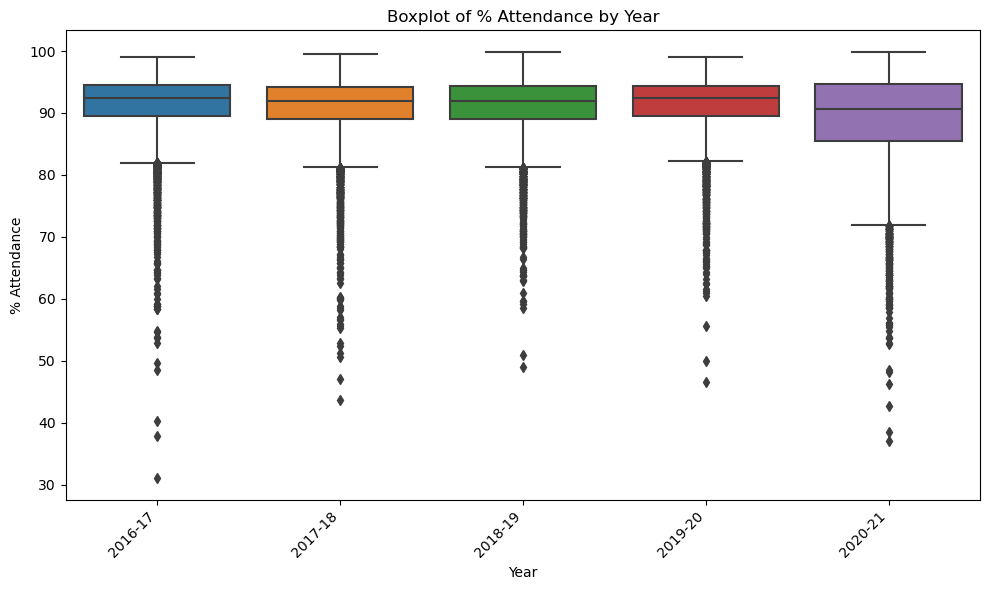

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='% Attendance', data=attendance_df2)
plt.title('Boxplot of % Attendance by Year')
plt.xlabel('Year')
plt.ylabel('% Attendance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

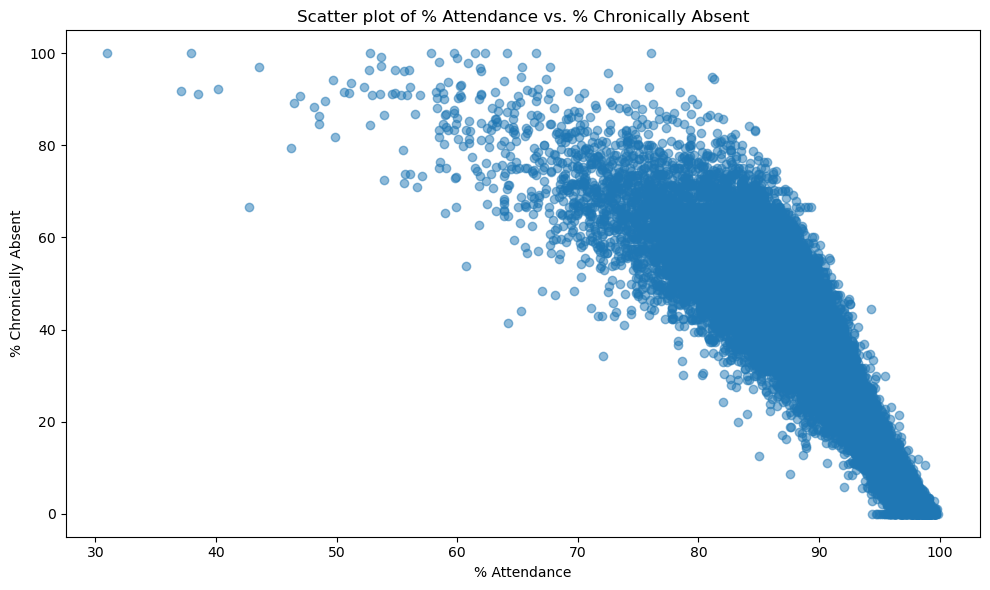

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(attendance_df2['% Attendance'], attendance_df2['% Chronically Absent'], alpha=0.5)
plt.title('Scatter plot of % Attendance vs. % Chronically Absent')
plt.xlabel('% Attendance')
plt.ylabel('% Chronically Absent')
plt.tight_layout()

## Insights:
- There is variation in attendance metrics across different schools and grades.
- Chronic absenteeism appears to be correlated with overall attendance, indicating the importance of monitoring and addressing absenteeism issues.
- Further analysis may be needed to understand the underlying factors contributing to attendance patterns and identify interventions to improve attendance rates.

## Recommendations:
- School administrators and policymakers should closely monitor attendance metrics to identify schools and grades with high rates of absenteeism.
- Implement targeted interventions to address chronic absenteeism, such as mentoring programs, parental engagement initiatives, and community partnerships.
- Conduct further research to understand the root causes of absenteeism and develop comprehensive strategies to improve attendance rates across schools.